W4 Practicals - Basic Parametric models and Statistical Learning

### Aims:
* To gain some experience in performing regression with linear and polynomial
models and classification with parametric models.
* To produce some assessable work for this subject.

In [2]:
# Common Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# ANSI color
class color:
  YELLOW_BOLD = '\033[1;33m'
  END = '\033[0m'

### Q1

In [21]:
# Specific Imports
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#### a. Plot the function ($f(x) = x^3 + 1$) over the domain [-1,1]. This is the “true” function for our regression problem. However, the data that we observe (i.e. what we train the model with) will have Gaussian noise added to the output/target values.

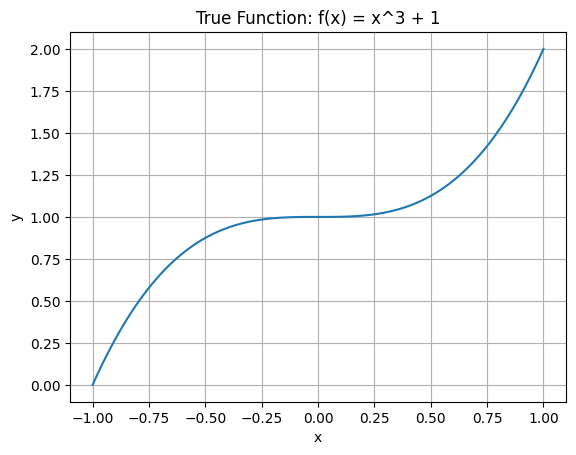

In [10]:
def f(x): return x**3+1

x = np.linspace(-1, 1, 100)
y = f(x)

plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('True Function: f(x) = x^3 + 1')
plt.grid(True)
plt.show()

#### b. Create a “sample training set” of 30 points by generating a random set of x/input values, and then corresponding outputs by evaluating the true function at each input value and adding Gaussian random noise. Plot the data on the same axes as the function.

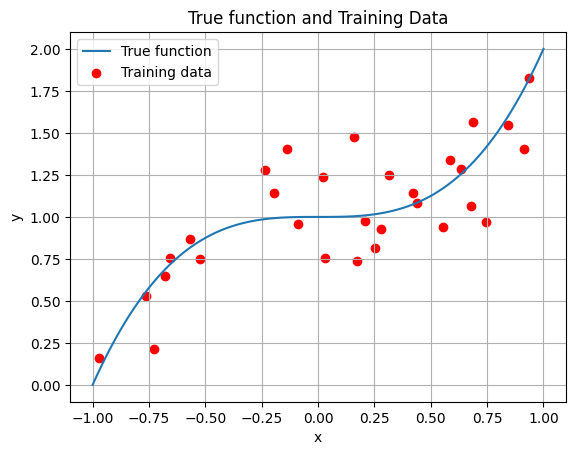

In [8]:
x_train = np.random.uniform(-1, 1, 30)
y_train = f(x_train)

noise = np.random.normal(loc=0, scale=0.2, size=30)  # loc = mean, scale = standard deviation
y_train_noisy = y_train + noise

plt.plot(x, y, label='True function')
plt.scatter(x_train, y_train_noisy, color='red', label='Training data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('True function and Training Data')
plt.grid(True)
plt.legend()
plt.show()


### c. Perform linear regression using your training set and calculate the training set (sum of squares) error.

Training set sum of squares error: 1.903595



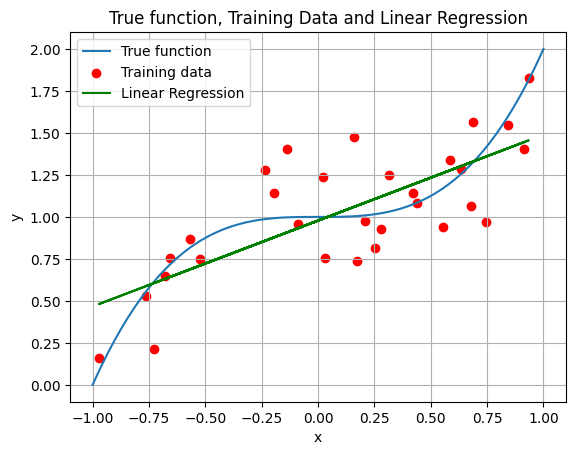

In [19]:
linear_reg = LinearRegression()

x_train_reshaped = x_train.reshape(-1, 1)
linear_reg.fit(x_train_reshaped, y_train_noisy)
y_pred = linear_reg.predict(x_train_reshaped)

sse = np.sum((y_train_noisy - y_pred)**2)

print(f"Training set sum of squares error: {sse:.6f}\n")

# Plotting to visualise the regression
def plotter(x, y, title):
  plt.plot(x, y, label='True function')
  plt.scatter(x_train, y_train_noisy, color='red', label='Training data')
  plt.plot(x_train, y_pred, color='green', label='Linear Regression')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(title)
  plt.grid(True)
  plt.legend()
  plt.show()


plotter(x, y, 'True function, Training Data and Linear Regression')

#### d. Perform polynomial regression using your training set and calculate the training set (sum of squares) error. Experiment with different order polynomials and observe the effect on the training set error.

Polynomial Regression (degree=1):
Training set sum of squares error: 1.903595


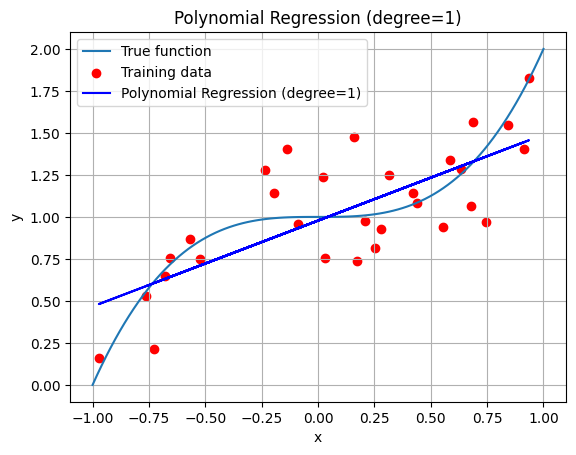

--------------------
Polynomial Regression (degree=2):
Training set sum of squares error: 1.848267


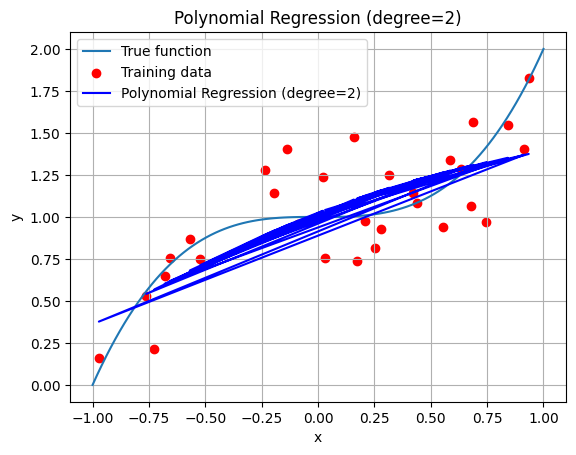

--------------------
Polynomial Regression (degree=3):
Training set sum of squares error: 1.317018


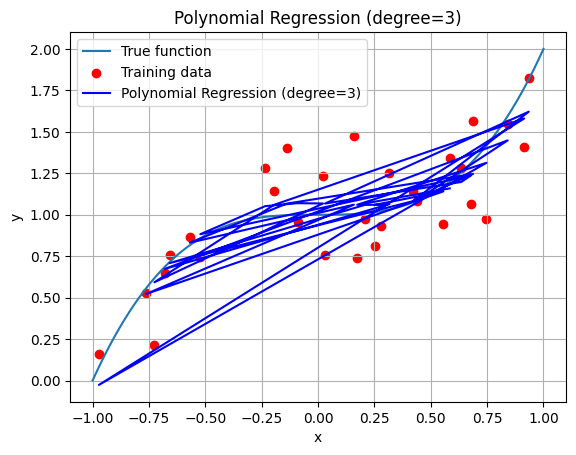

--------------------
Polynomial Regression (degree=4):
Training set sum of squares error: 1.273315


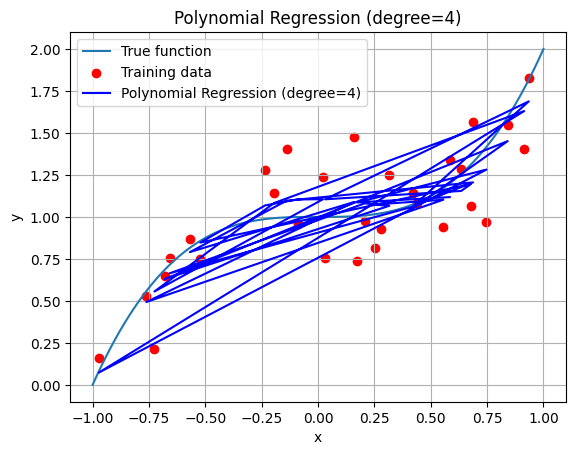

--------------------
Polynomial Regression (degree=5):
Training set sum of squares error: 1.208723


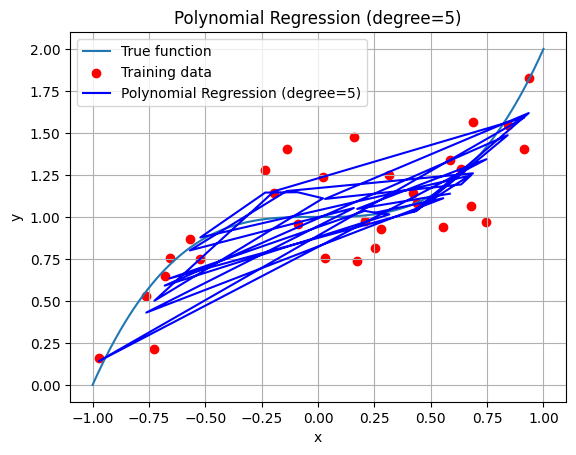

--------------------


In [25]:
for degree in range(1, 6):
    polynomial_features = PolynomialFeatures(degree=degree)
    x_train_poly = polynomial_features.fit_transform(x_train_reshaped)

    poly_reg = LinearRegression()
    poly_reg.fit(x_train_poly, y_train_noisy)
    y_pred_poly = poly_reg.predict(x_train_poly)

    sse_poly = np.sum((y_train_noisy - y_pred_poly)**2)

    print(f"Polynomial Regression (degree={degree}):")
    print(f"Training set sum of squares error: {sse_poly:.6f}")

    # Plotting to visualise the polynomial regression (optional)
    plt.plot(x, y, label='True function')
    plt.scatter(x_train, y_train_noisy, color='red', label='Training data')
    plt.plot(x_train, y_pred_poly, color='blue', label=f'Polynomial Regression (degree={degree})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Polynomial Regression (degree={degree})')
    plt.grid(True)
    plt.legend()
    plt.show()

    print("-" * 20)


### Q2

#### a. Download the dataset pokemonregr.csv from blackboard. This contains 7 of the columns from the pokemon dataset. Open the file in a spreadsheet or preview the first few lines to see what it “looks like”.

#### b. Fit a linear regression model to the data, using the final column (weight in kg) as the output/target variable.

#### c. What are the coefficients/parameters of your regression model?

#### d. Recall that the coefficients can be interpreted as a weight of the importance of each weight to the predicted output. Which feature is most important for predicting weight?

#### e. One potential issue is that the data you have used is not normalized
> read the short section at the end of Sec.2.2 in the textbook. Normalise your input features and refit the linear regression model. Compare the coefficients for the resulting model to your answer from (d).

### Q3

> Note: implementations of logistic regression can be a part of functions that do additional things and return lots of additional information. Don’t worry about this extra stuff for now. Feel free to use ChatGPT to help you with this question!

In [ ]:
# Specific Imports
from sklearn.linear_model import LogisticRegression

#### a. Fit a logistic regression model to the data in w3classif.csv. What are the model parameter values?


#### b. Given a test data point x’ = (1.1, 1.1), what does your model predict as p(y’=1|x’)?


In [ ]:
x = [1.1, 1.1]

#### c. Plot the data with discriminant function and the decision regions for your model.